<a href="https://colab.research.google.com/github/gasparmamac/DeepLearningNotebook/blob/main/M3_Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Convolutional Neural Networks
**Description**

This is an image classification practice using the ResNet50 - a pre-trained CNN model available in Keras API.

## Table of Contents


1.   Download the sample Images to be classified
2.   Read and Display Images
3.   Load the Model (ResNet50)
4.   Perform INference
5.   Conclusion



In [2]:
import tensorflow as tf
import requests
import zipfile
import matplotlib.pyplot as plt
import glob as glob
import os

## 1. Download the sample images to be classifified

In [3]:
def download_file(url, save_name):
  url = url
  if not os.path.exists(save_name):
    file = requests.get(url)
    open(save_name, 'wb').write(file.content)

In [4]:
def unzip(zip_file=None):
  try:
    with zipfile.ZipFile(zip_file) as z:
      z.extractall("./")
      print("Extract all")
  except:
    print("Invalid file")

In [26]:
download_file(
    'https://www.dropbox.com/s/cprmbjb8l3olyiv/dataset_image_classification_cnn.zip?dl=1',
    'dataset_image_classification_cnn.zip'
)

unzip(zip_file='dataset_image_classification_cnn.zip')

Extract all


In [33]:
download_file(
    'https://images.squarespace-cdn.com/content/v1/5c1074accc8fed6a4251da8f/1632825358284-7LGGMHZO98Q9L3FWUSKC/Coconut+Tree?format=2500w',
    'dataset_image_classification_cnn1.zip'
)

unzip(zip_file='dataset_image_classification_cnn1.zip')

Invalid file


## 2. Read and Display the Images

In [30]:
# store all the images path is a list
image_paths = glob.glob('dataset_image_classification_cnn/*.jpg')
print(image_paths)

['dataset_image_classification_cnn/dog.jpg', 'dataset_image_classification_cnn/car.jpg', 'dataset_image_classification_cnn/tiger.jpg']


In [29]:
# Displaying the Sample Test Images
plt.figure(figsize=(20,8))
for idx, image_path in enumerate(image_paths):
  image = plt.imread(image_path)
  plt.subplot(1,3 , idx+1)
  plt.imshow(image)
  plt.axis('off')
plt.show()

<Figure size 2000x800 with 0 Axes>

## 3. Load the Model (ResNet50)

In [9]:
# load the pre-trained ResNet50 model
model = tf.keras.applications.resnet50.ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


In [10]:
model.output_shape

(None, 1000)

## 4. Perfom Inference

1/1 [==============================] - 0s 203ms/step


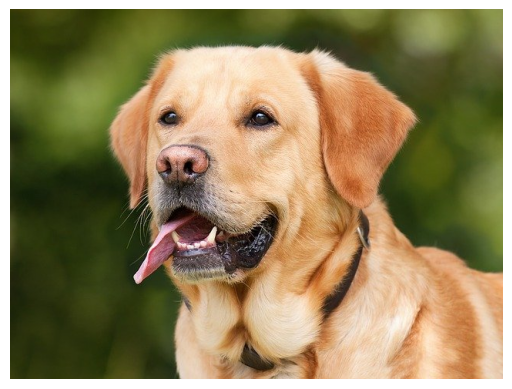

Prediction 0: Labrador_retriever, 70.46%
Prediction 1: golden_retriever, 26.02%
Prediction 2: Rhodesian_ridgeback, 1.71%
Prediction 3: Chesapeake_Bay_retriever, 0.27%
Prediction 4: Tibetan_mastiff, 0.14%
1/1 [==============================] - 0s 257ms/step


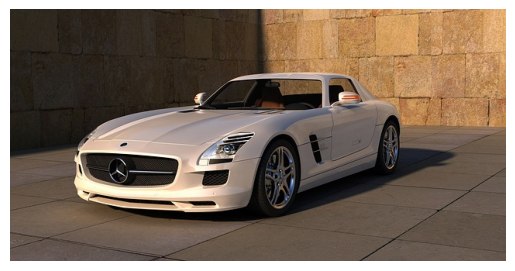

Prediction 0: sports_car, 49.18%
Prediction 1: racer, 24.73%
Prediction 2: car_wheel, 10.71%
Prediction 3: convertible, 5.65%
Prediction 4: cab, 2.90%
1/1 [==============================] - 0s 214ms/step


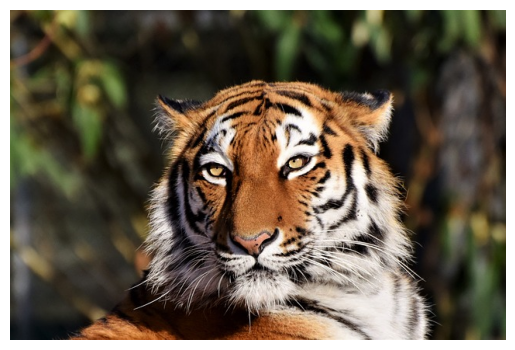

Prediction 0: tiger, 61.33%
Prediction 1: tiger_cat, 37.18%
Prediction 2: jaguar, 0.70%
Prediction 3: lynx, 0.23%
Prediction 4: leopard, 0.07%


In [16]:
# Pre-Processing

for _, image_path in enumerate(image_paths):
  # read the images using the TensoFlow
  tf_image = tf.io.read_file(image_path)

  # decode the above tf_image from a Bytes string to a tensor
  decoded_image = tf.image.decode_image(tf_image)

  # resize the image
  image_resized = tf.image.resize(decoded_image, (224,224))

  # add batch dimension at the beginning
  image_batch = tf.expand_dims(image_resized, axis=0)

  # preprocess the batched image to bring it to appropriate scale
  image_batch= tf.keras.applications.imagenet_utils.preprocess_input(image_batch)

  # forward pass through the model
  predictions = model.predict(image_batch)

  # decode the predictions from class to actual class names
  processed_preds = tf.keras.applications.imagenet_utils.decode_predictions(preds=predictions, top=5)

  # display the image and print the top 5 prediction for each
  plt_image = plt.imread(image_path)
  plt.imshow(plt_image)
  plt.axis('off')
  plt.show()
  for num, pred in enumerate(processed_preds[0]):
   print(f"Prediction {num}: {pred[1]}, {pred[2]*100:.2f}%")
